# Prepare baseline tokenizer

In [1]:
import pandas as pd
import tokenizers
from dataclasses import dataclass
from pandarallel import pandarallel
from rdkit import Chem
from tqdm.auto import tqdm

tqdm.pandas()
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/opt/miniconda/lib/python3.8/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
%load_ext autoreload
%autoreload 2
from nncomp_molecule.preprocessors import InChIRuleBasedTokenizer
from nncomp_molecule import constants

## Config

In [3]:
NOTEBOOK_ID = "bms-molecular-translation-tokenizers"
OUTDIR = constants.INPUTDIR / "kfujikawa" / NOTEBOOK_ID

In [5]:
train_df = pd.read_csv(constants.COMPETITION_DATADIR / "train_labels.csv")
train_df.head()

,image_id,InChI
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
1,000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...
2,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...
3,000026b49b7e,InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...
4,000026fc6c36,InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...


In [7]:
# tokenizer = InChIRuleBasedTokenizer()
# tokenizer.fit_on_texts(train_df.InChI)
# tokenizer.save(OUTDIR / "rulebase-v1.json")

In [13]:
tokenizer = InChIRuleBasedTokenizer(OUTDIR / "rulebase-v1.json")
token_ids = tokenizer(train_df.InChI[0])["token_ids"]
[tokenizer.itos[x] for x in token_ids]
tokenizer.decode(token_ids)

'/n/h1SC13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3'

In [14]:
train_df.InChI[0]

'InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3'

In [16]:
_tokenizer = InChIRuleBasedTokenizer(OUTDIR / "rulebase-v1.json")
len(_tokenizer.stoi)

195

In [12]:
from collections import Counter

counter = Counter()
train_df.InChI.progress_apply(lambda x: [counter.update(_x[0]) for _x in x.replace("InChI=1S/", "").split("/")[1:]])
counter

Counter({'c': 2424186,
         'h': 2424028,
         't': 399794,
         'm': 396177,
         's': 396150,
         'b': 152473,
         'i': 2645})

In [9]:
train_df["n_tokens"] = train_df.InChI.progress_apply(lambda x: len(tokenizer.encode(x).ids))

<AxesSubplot:>

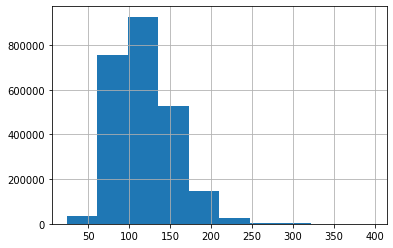

In [13]:
train_df["n_tokens"].hist()

In [14]:
train_df["n_tokens"].max()

396